In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
num_samples = 100
bias = 1.1

theta = np.linspace(0, 2*np.pi, num_samples)

r1 = np.random.rand((num_samples))
r2 = np.random.rand((num_samples))

x1 = (r1 * np.cos(theta)).reshape(-1, 1)
y1 = (r1 * np.sin(theta)).reshape(-1, 1)

x2 = (r2 * np.cos(theta) + bias).reshape(-1, 1)
y2 = (r2 * np.sin(theta) + bias).reshape(-1, 1)

s1 = np.hstack([x1,y1, np.ones_like(x1)])
s2 = np.hstack([x2,y2, np.zeros_like(x2)])

data = np.vstack([s1,s2])
data = np.hstack([np.ones([data.shape[0],1]),data])

In [25]:
np.random.shuffle(data)

split_ind = int(np.floor((num_samples*7)/10))

train,test = data[split_ind:],data[:split_ind]

(x_train,y_train) = (train[:,:data.shape[1]-1],train[:,-1])
(x_test,y_test) = (test[:,:data.shape[1]-1],test[:,-1])

In [26]:
def sigma(x,theta):
    h = x.dot(theta)
    return 1.0 / (1 + np.exp(-h))

In [27]:
def accuracy(probability, y_true):
    return sum([1 if p>0.5 else 0 for p in probability]==y_true)/len(y_true)

In [28]:
def gradient_descent(rate,data,label,iter=1000):
    theta = np.zeros(data.shape[1],)
    m = data.shape[0]
    for _ in range(iter):
        current_prediction = sigma(data,theta)
        theta -= (rate/m)*(data.T.dot((current_prediction - label)))
    return theta

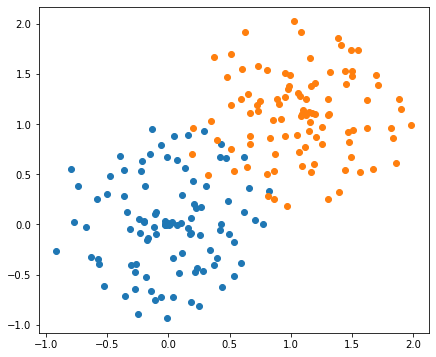

In [29]:
plt.figure(figsize=(7,6))
plt.scatter(x1, y1, marker='o', linestyle='-', label='Samples')
plt.scatter(x2, y2, marker='o', linestyle='-', label='Samples')

In [30]:
alpha = 0.01
iter = 5000
theta = gradient_descent(alpha,x_train,y_train,iter)
print(theta)

[ 2.29055488 -2.46792579 -2.26891962]


## Accuracy

In [31]:
prediction_test = sigma(x_test,theta)
accuracy_test = accuracy(prediction_test,y_test)
accuracy_test

0.9571428571428572

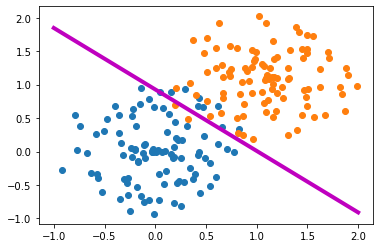

In [32]:
x = np.linspace(-1,2, 20)
y = -(theta[2]*x+theta[0])/theta[1]
plt.scatter(data[:,1][data[:,3] ==1], data[:,2][data[:,3] ==1] )
plt.scatter(data[:,1][data[:,3] ==0], data[:,2][data[:,3] ==0])
plt.plot(x,y,'m',linewidth=4)